<a href="https://colab.research.google.com/github/QA-MilaAndrade/ProjetoRegressaoLinear/blob/main/Projeto_Residencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafio unidade 9

# <h1 style='background:#00FFFF; border:2; border-radius: 10px; font-size:250%; font-weight: bold; color:black'><center>TOP INSTAGRAM INFLUENCERS DATA</center></h1>

<img src = "https://i.gifer.com/9uhG.gif" width = 900 height = 400/>

Sobre este arquivo:

Neste arquivo, basicamente há 10 atributos. Ele foi ordenado com base na classificação que foi decidida com base em "seguidores".

rank: Classificação do Influenciador com base no número de seguidores que ele tem

channel_info: Nome de usuário do Instagrammer

influence score: Pontuação de influência dos usuários. É calculado com base em menções, importância e popularidade

posts: Número de posts que eles fizeram até agora

followers: Número de seguidores do usuário

avg_likes: Média de curtidas em posts do Instagrammer (total de curtidas/total de posts)

60_day_eng_rate: Taxa de engajamento dos últimos 60 dias do Instagrammer como facção de engajamentos que eles fizeram até agora

new_post_avg_like: Média de curtidas que eles têm em novos posts

total de curtidas: Total de curtidas que o usuário obteve em seus posts. (em bilhões)

country: País ou região de origem do usuário.
<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
    

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Baixar o arquivo usando o gdown
!gdown '1MD0tpQI27v-Jmm9ZNFukUJPi0_KUn5_i'

# Verificar os arquivos no diretório atual
!ls

# Tentar carregar o arquivo baixado
try:
    dataset = pd.read_csv('top_insta_influencers_data.csv')  # Certifique-se que o nome esteja correto após o !ls
    print("Arquivo carregado com sucesso!")
    dataset.head()
except FileNotFoundError:
    print("Arquivo não encontrado. Verifique o nome ou caminho do arquivo.")

# Opcional: Verifique o diretório atual
import os
print("Diretório atual:", os.getcwd())


Downloading...
From: https://drive.google.com/uc?id=1MD0tpQI27v-Jmm9ZNFukUJPi0_KUn5_i
To: /content/top_insta_influencers_data.csv
100% 12.6k/12.6k [00:00<00:00, 30.0MB/s]
sample_data  top_insta_influencers_data.csv
Arquivo carregado com sucesso!
Diretório atual: /content


In [ ]:
dataset.head()


,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [ ]:
len(dataset)

200

In [ ]:
# Renomear as colunas para facilitar a interpretação
dataset.rename(columns={
    'rank':'Classificação',
    'channel_info': 'Nome',
    'influence_score': 'Pontuação',
    'posts': 'Postagens',
    'followers': 'Seguidores',
    'avg_likes': 'Media_Curtidas',
    '60_day_eng_rate': 'Taxa_Engajamento',
    'new_post_avg_like': 'Media_Curtidas_Novas',
    'total_likes': 'Likes',
    'country': 'País'}, inplace=True)

# Exibir as primeiras linhas do dataset para verificar as mudanças
dataset.head()


,Classificação,Nome,Pontuação,Postagens,Seguidores,Media_Curtidas,Taxa_Engajamento,Media_Curtidas_Novas,Likes,País
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


1. Definição e Preparação do Problema -  Realizando Analise Exploratória

In [ ]:
# Inicializar um DataFrame vazio para armazenar a análise
analise_insta = pd.DataFrame()
# Remover linhas com valores NaN
analise_insta.dropna(inplace=True)

# Adicionar as colunas relevantes do dataset original
analise_insta['Classificação'] = dataset['Classificação']
analise_insta['Nome'] = dataset['Nome']
analise_insta['Pontuação'] = dataset['Pontuação']
analise_insta['Postagens'] = dataset['Postagens']
analise_insta['Seguidores'] = dataset['Seguidores']
analise_insta['Media_Curtidas'] = dataset['Media_Curtidas']
analise_insta['Taxa_Engajamento'] = dataset['Taxa_Engajamento']
analise_insta['Media_Curtidas_Novas'] = dataset['Media_Curtidas_Novas']
analise_insta['Likes'] = dataset['Likes']
analise_insta['País'] = dataset['País']

# Função para converter os valores de 'k', 'm', 'b','%' para números inteiros
def convert_to_numeric(value):
    if isinstance(value, str):
        if 'm' in value:
            return float(value.replace('m', '')) * 1_000_000
        elif 'k' in value:
            return float(value.replace('k', '')) * 1_000
        elif 'b' in value:
            return float(value.replace('b', '')) * 1_000_000_000
        elif '%' in value:
            return float(value.replace('%',''))/100
    else:
     return value

# Aplicar a função de conversão para colunas relevantes
analise_insta['Postagens'] = dataset['Postagens'].apply(convert_to_numeric)
analise_insta['Seguidores'] = dataset['Seguidores'].apply(convert_to_numeric)
analise_insta['Media_Curtidas'] = dataset['Media_Curtidas'].apply(convert_to_numeric)
analise_insta['Taxa_Engajamento'] = dataset['Taxa_Engajamento'].apply(convert_to_numeric)
analise_insta['Media_Curtidas_Novas'] = dataset['Media_Curtidas_Novas'].apply(convert_to_numeric)
analise_insta['Likes'] = dataset['Likes'].apply(convert_to_numeric)

# Visualizar o DataFrame final
print(analise_insta.head())



   Classificação         Nome  Pontuação  Postagens   Seguidores  \
0              1    cristiano         92     3300.0  475800000.0   
1              2  kyliejenner         91     6900.0  366200000.0   
2              3     leomessi         90      890.0  357300000.0   
3              4  selenagomez         93     1800.0  342700000.0   
4              5      therock         91     6800.0  334100000.0   

   Media_Curtidas  Taxa_Engajamento  Media_Curtidas_Novas         Likes  \
0       8700000.0            0.0139             6500000.0  2.900000e+10   
1       8300000.0            0.0162             5900000.0  5.740000e+10   
2       6800000.0            0.0124             4400000.0  6.000000e+09   
3       6200000.0            0.0097             3300000.0  1.150000e+10   
4       1900000.0            0.0020              665300.0  1.250000e+10   

            País  
0          Spain  
1  United States  
2            NaN  
3  United States  
4  United States  


In [ ]:
# Visualizar toda base de dados
analise_insta

,Classificação,Nome,Pontuação,Postagens,Seguidores,Media_Curtidas,Taxa_Engajamento,Media_Curtidas_Novas,Likes,País
0,1,cristiano,92,3300.0,475800000.0,8700000.0,0.0139,6500000.0,2.900000e+10,Spain
1,2,kyliejenner,91,6900.0,366200000.0,8300000.0,0.0162,5900000.0,5.740000e+10,United States
2,3,leomessi,90,890.0,357300000.0,6800000.0,0.0124,4400000.0,6.000000e+09,NaN
3,4,selenagomez,93,1800.0,342700000.0,6200000.0,0.0097,3300000.0,1.150000e+10,United States
4,5,therock,91,6800.0,334100000.0,1900000.0,0.0020,665300.0,1.250000e+10,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,iambeckyg,71,2300.0,33200000.0,623800.0,0.0140,464700.0,1.400000e+09,United States
196,197,nancyajram,81,3800.0,33200000.0,390400.0,0.0064,208000.0,1.500000e+09,France
197,198,luansantana,79,770.0,33200000.0,193300.0,0.0026,82600.0,1.492000e+08,Brazil
198,199,nickjonas,78,2300.0,33000000.0,719600.0,0.0142,467700.0,1.700000e+09,United States


In [ ]:
#Obter um resumo das estatísticas descritivas das colunas numéricas
analise_insta.describe()

,Classificação,Pontuação,Postagens,Seguidores,Media_Curtidas,Taxa_Engajamento,Media_Curtidas_Novas,Likes
count,200.000000,200.000000,200.000000,2.000000e+02,2.000000e+02,199.000000,1.920000e+02,2.000000e+02
mean,100.500000,81.820000,3499.850000,7.740950e+07,1.787104e+06,0.019020,1.258471e+06,3.658112e+09
std,57.879185,8.878159,3475.828158,7.368727e+07,2.193359e+06,0.033297,1.879979e+06,5.561939e+09
min,1.000000,22.000000,10.000000,3.280000e+07,6.510000e+04,0.000100,7.700000e+03,1.830000e+07
25%,50.750000,80.000000,947.500000,4.000000e+07,5.044000e+05,0.004100,2.214500e+05,9.968500e+08
50%,100.500000,84.000000,2100.000000,5.005000e+07,1.100000e+06,0.008800,5.722000e+05,2.000000e+09
75%,150.250000,86.000000,5025.000000,6.890000e+07,2.100000e+06,0.020350,1.400000e+06,3.900000e+09
max,200.000000,93.000000,17500.000000,4.758000e+08,1.540000e+07,0.264100,1.260000e+07,5.740000e+10


In [ ]:
#  Verificar se há valores ausentes em alguma coluna
analise_insta.isna().sum()

,0
Classificação,0
Nome,0
Pontuação,0
Postagens,0
Seguidores,0
Media_Curtidas,0
Taxa_Engajamento,1
Media_Curtidas_Novas,8
Likes,0
País,62


In [ ]:
#Exibir informações gerais
analise_insta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Classificação         200 non-null    int64  
 1   Nome                  200 non-null    object 
 2   Pontuação             200 non-null    int64  
 3   Postagens             200 non-null    float64
 4   Seguidores            200 non-null    float64
 5   Media_Curtidas        200 non-null    float64
 6   Taxa_Engajamento      199 non-null    float64
 7   Media_Curtidas_Novas  192 non-null    float64
 8   Likes                 200 non-null    float64
 9   País                  138 non-null    object 
dtypes: float64(6), int64(2), object(2)
memory usage: 15.8+ KB


In [ ]:
#visualização dos nomes das colunas
analise_insta.columns

Index(['Classificação', 'Nome', 'Pontuação', 'Postagens', 'Seguidores',
       'Media_Curtidas', 'Taxa_Engajamento', 'Media_Curtidas_Novas', 'Likes',
       'País'],
      dtype='object')

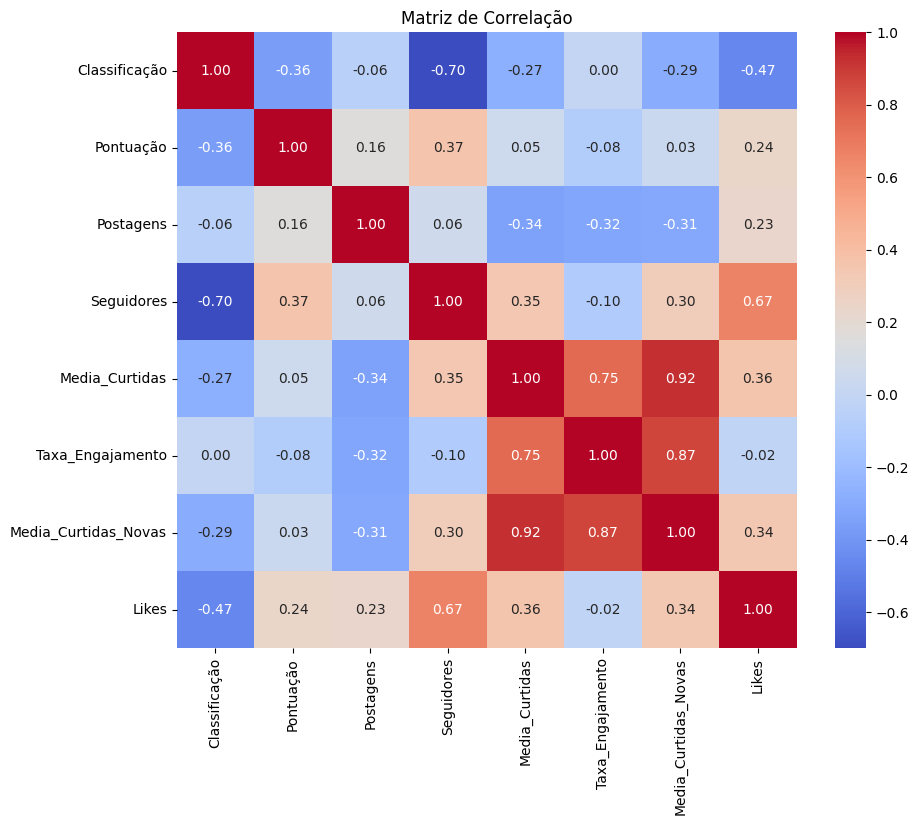

In [ ]:
# Matriz de Correlação
# Select only numeric columns for correlation calculation
numeric_columns = analise_insta.select_dtypes(include=np.number).columns
correlation_matrix = analise_insta[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlação')
plt.show()


Correlação com a taxa de engajamento:
Media_Curtidas          1.000000
Media_Curtidas_Novas    0.920395
Taxa_Engajamento        0.754587
Likes                   0.357940
Seguidores              0.349195
Pontuação               0.051478
Classificação          -0.274343
Postagens              -0.343087
Name: Media_Curtidas, dtype: float64


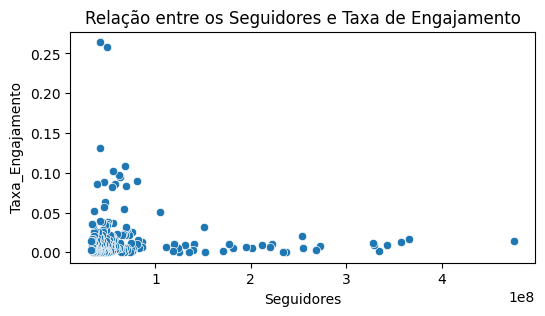

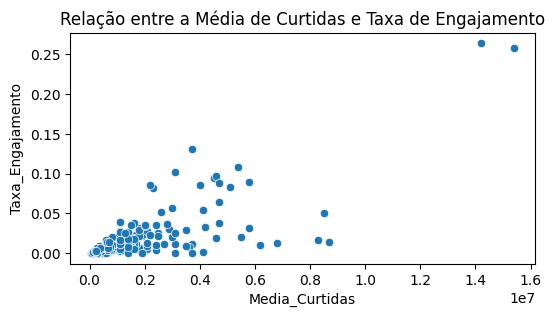

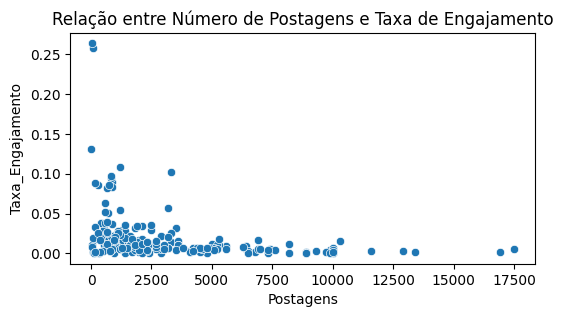

In [ ]:


# Correlação com a variável dependente
engagement_corr = correlation_matrix['Media_Curtidas'].sort_values(ascending=False)
print("\nCorrelação com a taxa de engajamento:")
print(engagement_corr)

# Visualizar relações entre variáveis importantes
plt.figure(figsize=(6, 3))
sns.scatterplot(data=analise_insta, x='Seguidores', y='Taxa_Engajamento')
plt.title('Relação entre os Seguidores e Taxa de Engajamento')
plt.show()

plt.figure(figsize=(6, 3))
sns.scatterplot(data=analise_insta, x='Media_Curtidas', y='Taxa_Engajamento')
plt.title('Relação entre a Média de Curtidas e Taxa de Engajamento')
plt.show()

plt.figure(figsize=(6, 3))
sns.scatterplot(data=analise_insta, x='Postagens', y='Taxa_Engajamento')
plt.title('Relação entre Número de Postagens e Taxa de Engajamento')
plt.show()


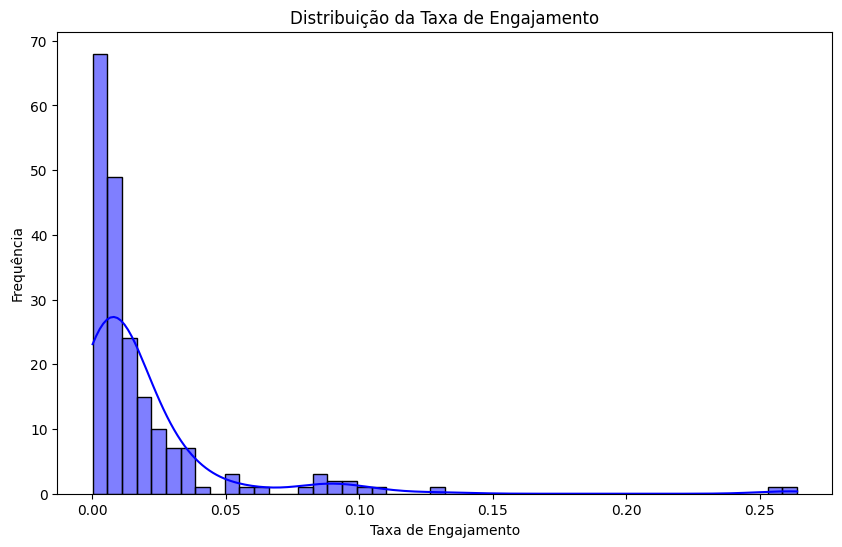

In [ ]:

# Distribuição da Taxa de Engajamento (Explorar variável Dependente)
plt.figure(figsize=(10, 6))
sns.histplot(analise_insta['Taxa_Engajamento'], kde=True, color='blue')
plt.title('Distribuição da Taxa de Engajamento')
plt.xlabel('Taxa de Engajamento')
plt.ylabel('Frequência')
plt.show()

2. Implementação do Algoritmo de Regressão Linear

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Escolher variáveis dependente e independentes
X = analise_insta[['Seguidores', 'Media_Curtidas', 'Postagens', 'Media_Curtidas_Novas', 'Pontuação']]
y = analise_insta['Taxa_Engajamento']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preencher valores ausentes em X_train e X_test
imputer = SimpleImputer(strategy="mean")
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Preencher valores ausentes em y_train
y_train.fillna(y_train.mean(), inplace=True)

# Criar e treinar o modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Coeficiente de Determinação (R²): {r2}")


Mean Squared Error (MSE): 8.825049166544627e-05
Coeficiente de Determinação (R²): 0.8606784919005231


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score

# Normalização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Seleção de variáveis
selector = SelectKBest(score_func=f_regression, k=3)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Modelagem com Ridge
model_ridge = Ridge(alpha=0.1)
model_ridge.fit(X_train_selected, y_train)
y_pred = model_ridge.predict(X_test_selected)

# Avaliação do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, R²: {r2}")


MSE: 8.089205587305476e-05, R²: 0.8722952925834655


3. Otimização e Ajustes

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# 1. Carregar e dividir os dados
X = analise_insta[['Seguidores', 'Media_Curtidas', 'Postagens', 'Media_Curtidas_Novas', 'Pontuação']]
y = analise_insta['Taxa_Engajamento']

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Imputação de valores ausentes
# Para X_train e X_test
imputer_X = SimpleImputer(strategy="mean")
X_train = pd.DataFrame(imputer_X.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer_X.transform(X_test), columns=X_test.columns)

# Para y_train
y_train = y_train.fillna(y_train.mean())
y_test = y_test.fillna(y_test.mean())

# 3. Normalização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Regularização com Lasso e Ridge
# Lasso (L1)
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train_scaled, y_train)
y_pred_lasso = model_lasso.predict(X_test_scaled)
print("MSE Lasso:", mean_squared_error(y_test, y_pred_lasso))
print("R² Lasso:", r2_score(y_test, y_pred_lasso))

# Ridge (L2)
model_ridge = Ridge(alpha=0.1)
model_ridge.fit(X_train_scaled, y_train)
y_pred_ridge = model_ridge.predict(X_test_scaled)
print("MSE Ridge:", mean_squared_error(y_test, y_pred_ridge))
print("R² Ridge:", r2_score(y_test, y_pred_ridge))

# 5. Validação cruzada com LinearRegression
model_lr = LinearRegression()
cv_scores = cross_val_score(model_lr, X_train_scaled, y_train, cv=5, scoring='r2')
print("R² médio (Validação Cruzada):", np.mean(cv_scores))

# 6. Seleção de Recursos
# Seleção de variáveis mais relevantes
selector = SelectKBest(score_func=f_regression, k=3)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Treinando modelo com variáveis selecionadas
model_lr.fit(X_train_selected, y_train)
y_pred_selected = model_lr.predict(X_test_selected)
print("MSE Seleção de Recursos:", mean_squared_error(y_test, y_pred_selected))
print("R² Seleção de Recursos:", r2_score(y_test, y_pred_selected))


MSE Lasso: 0.0006361905326430918
R² Lasso: -0.004357287690322398
MSE Ridge: 8.798348747772804e-05
R² Ridge: 0.8611000127940588
R² médio (Validação Cruzada): 0.7753180855893822
MSE Seleção de Recursos: 8.079502152850793e-05
R² Seleção de Recursos: 0.8724484812055862


4.

Métricas de Avaliação no Conjunto de Teste:
Mean Squared Error (MSE): 8.798348747772804e-05
Mean Absolute Error (MAE): 0.006222270049585442
Coeficiente de Determinação (R²): 0.8611000127940588

Interpretação dos Coeficientes do Modelo Ridge:
               Variável  Coeficiente
3  Media_Curtidas_Novas     0.033958
4             Pontuação     0.001998
1        Media_Curtidas     0.000696
2             Postagens    -0.000196
0            Seguidores    -0.015379


<ipython-input-17-d325969db410>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coeficiente", y="Variável", data=coeficientes, palette="coolwarm")


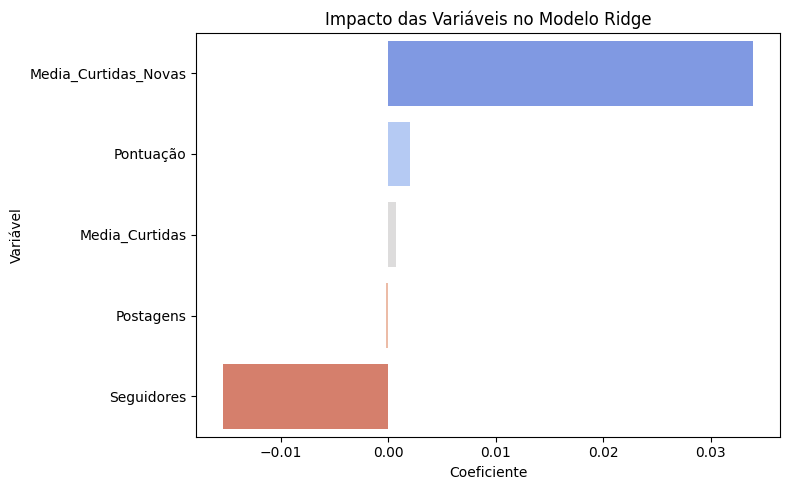

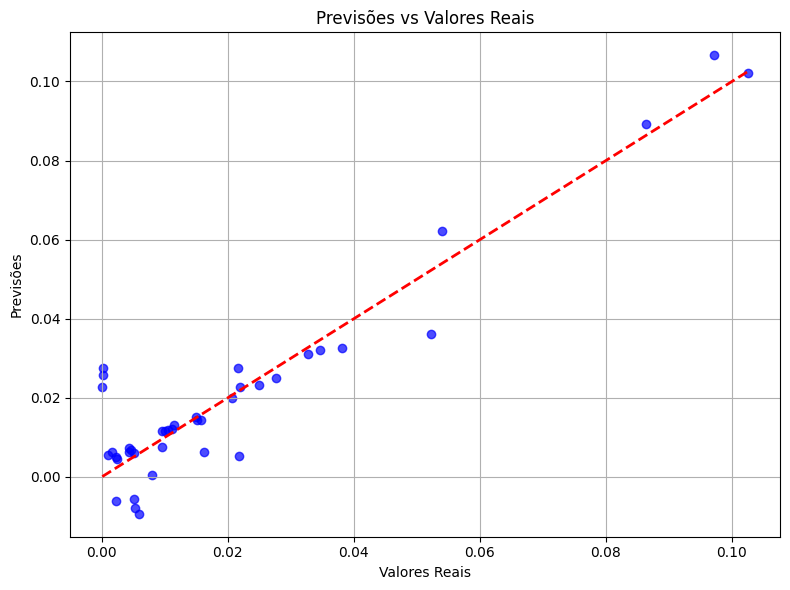

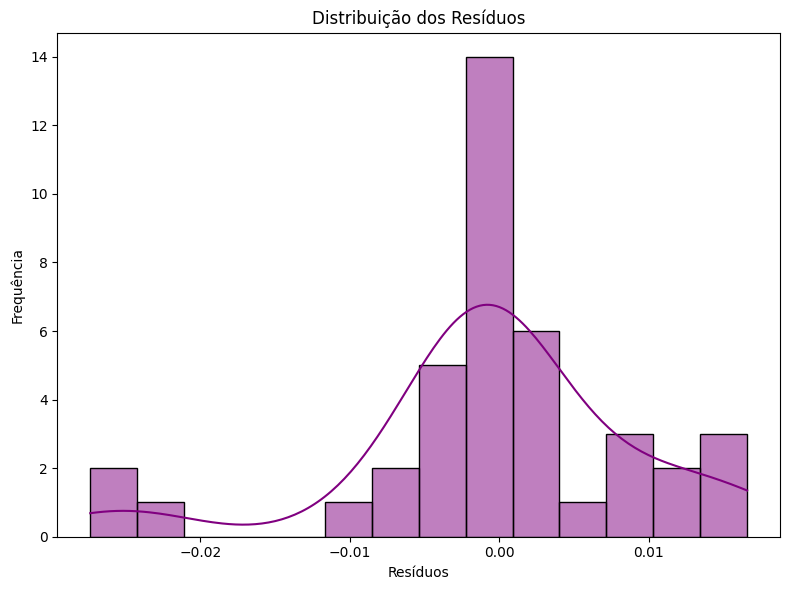

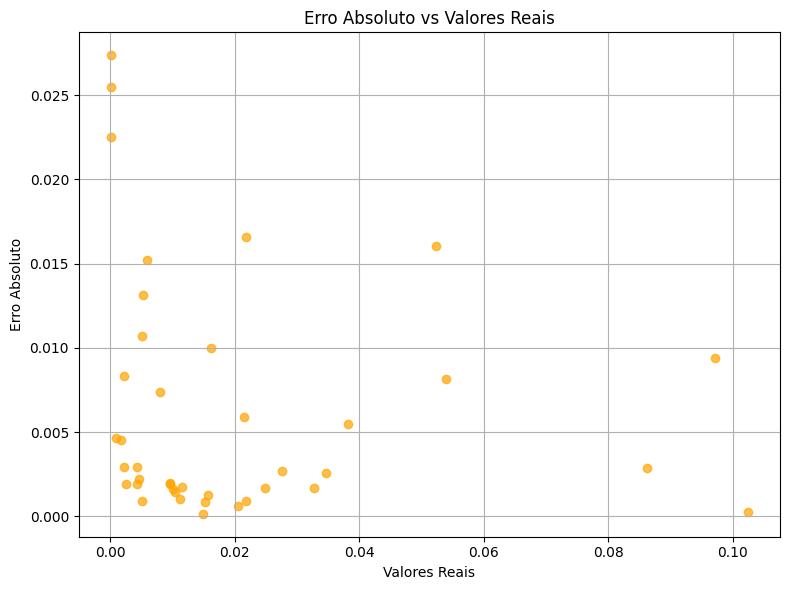

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Cálculo das Métricas de Avaliação
# Previsões no conjunto de teste
y_pred = model_ridge.predict(X_test_scaled)  # Modelo Ridge escolhido como exemplo

# Cálculo das métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Métricas de Avaliação no Conjunto de Teste:")

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Coeficiente de Determinação (R²): {r2}")

# 2. Interpretação dos Coeficientes
# Recuperar coeficientes do modelo Ridge
coeficientes = pd.DataFrame({
    'Variável': X.columns,
    'Coeficiente': model_ridge.coef_
})
coeficientes = coeficientes.sort_values(by="Coeficiente", ascending=False)

print("\nInterpretação dos Coeficientes do Modelo Ridge:")
print(coeficientes)

# Visualizar coeficientes
plt.figure(figsize=(8, 5))
sns.barplot(x="Coeficiente", y="Variável", data=coeficientes, palette="coolwarm")
plt.title("Impacto das Variáveis no Modelo Ridge")
plt.xlabel("Coeficiente")
plt.ylabel("Variável")
plt.tight_layout()
plt.show()

# 3. Visualizações Gráficas
# a) Previsões vs Valores Reais
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="b")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title("Previsões vs Valores Reais")
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.grid(True)
plt.tight_layout()
plt.show()

# b) Resíduos
residuos = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuos, kde=True, color="purple")
plt.title("Distribuição dos Resíduos")
plt.xlabel("Resíduos")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()

# c) Erro Absoluto
plt.figure(figsize=(8, 6))
plt.scatter(y_test, abs(residuos), alpha=0.7, color="orange")
plt.title("Erro Absoluto vs Valores Reais")
plt.xlabel("Valores Reais")
plt.ylabel("Erro Absoluto")
plt.grid(True)
plt.tight_layout()
plt.show()
